#### OBJETIVO
- Prever se um passageiro foi transportado para uma dimensão alternativa durante a colisão da nave espacial Titanic

In [222]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
import sweetviz as sv

from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [223]:
# pd.read_csv('sample_submission.csv')

In [224]:
test = pd.read_csv('test.csv')
test['CryoSleep'] = test['CryoSleep'].replace([False, True],[0,1])
test['VIP'] = test['VIP'].replace([False, True],[0,1])
test[['Id','Group']] = test.PassengerId.str.split("_",expand=True,)
test[['Deck','Num','Side']] = test.Cabin.str.split("/",expand=True,)
test.drop(['Name', 'Cabin'], inplace=True, axis=1)

test['Id'] =  test['Id'].astype(int)
test['Group'] =  test['Group'].astype(float)
test['Num'] =  test['Num'].astype(float)
test['CryoSleep'] =  test['CryoSleep'].astype(float)
test['VIP'] =  test['VIP'].astype(float)

test['HomePlanet'] = test['HomePlanet'].fillna('other')
test['CryoSleep'] = test['CryoSleep'].fillna(test['CryoSleep'].mean())
test['Destination'] = test['Destination'].fillna('other')
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['VIP'] = test['VIP'].fillna(test['VIP'].mean())
test['RoomService'] = test['RoomService'].fillna(test['RoomService'].mean())
test['FoodCourt'] = test['FoodCourt'].fillna(test['FoodCourt'].mean())
test['ShoppingMall'] = test['ShoppingMall'].fillna(test['ShoppingMall'].mean())  
test['Spa'] = test['Spa'].fillna(test['Spa'].mean()) 
test['VRDeck'] = test['VRDeck'].fillna(test['VRDeck'].mean()) 
test['Deck'] = test['Deck'].fillna('other')
test['Num'] = test['Num'].fillna(test['Num'].mean())
test['Side'] = test['Side'].fillna('other')


In [225]:
train = pd.read_csv('train.csv')
train.loc[train['Name'] == 'Elaney Webstephrey']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
156,0179_01,Earth,False,G/26/P,TRAPPIST-1e,19.0,False,1.0,219.0,673.0,2.0,11.0,Elaney Webstephrey,True
956,1018_01,Earth,True,G/150/P,TRAPPIST-1e,18.0,False,0.0,0.0,0.0,0.0,0.0,Elaney Webstephrey,True


In [246]:
my_report = sv.analyze(train, target_feat='Transported')
my_report.show_html()

                                             |                            | [  0%]   00:00 -> (? left)

c:\users\aluga.com\appdata\local\programs\python\python39\lib\site-packages\sweetviz\utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
c:\users\aluga.com\appdata\local\programs\python\python39\lib\site-packages\sweetviz\utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
c:\users\aluga.com\appdata\local\programs\python\python39\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
c:\users\aluga.com\appdata\local\programs\python\python39\lib

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Transform Data

#### Replace and Split values

In [226]:
train['CryoSleep'] = train['CryoSleep'].replace([False, True],[0,1])
train['VIP'] = train['VIP'].replace([False, True],[0,1])
train[['Id','Group']] = train.PassengerId.str.split("_",expand=True,)
train[['Deck','Num','Side']] = train.Cabin.str.split("/",expand=True,)
train.drop(['Name', 'Cabin'], inplace=True, axis=1) 

#### Change Types

In [227]:
train['Id'] =  train['Id'].astype(int)
train['Group'] =  train['Group'].astype(float)
train['Num'] =  train['Num'].astype(float)
train['CryoSleep'] =  train['CryoSleep'].astype(float)
train['VIP'] =  train['VIP'].astype(float)

#### Replace null values

In [228]:
train['HomePlanet'] = train['HomePlanet'].fillna('other')
train['CryoSleep'] = train['CryoSleep'].fillna(train['CryoSleep'].mean())
train['Destination'] = train['Destination'].fillna('other')
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['VIP'] = train['VIP'].fillna(train['VIP'].mean())
train['RoomService'] = train['RoomService'].fillna(train['RoomService'].mean())
train['FoodCourt'] = train['FoodCourt'].fillna(train['FoodCourt'].mean())
train['ShoppingMall'] = train['ShoppingMall'].fillna(train['ShoppingMall'].mean())
train['Spa'] = train['Spa'].fillna(train['Spa'].mean())
train['VRDeck'] = train['VRDeck'].fillna(train['VRDeck'].mean())
train['Deck'] = train['Deck'].fillna('other')
train['Num'] = train['Num'].fillna(train['Num'].mean())
train['Side'] = train['Side'].fillna('other')

In [229]:
train.head(1)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Id,Group,Deck,Num,Side
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False,1,1.0,B,0.0,P


### Feature Eng

In [230]:
train['CryoSleep_HomePlanet'] = 0
train['CryoSleep_Destination'] = 0
train['CryoSleep_Deck'] = 0
train['CryoSleep_RoomService'] = 0
train['CryoSleep_RoomService<343'] = 0
train['CryoSleep_RoomService_Spa'] = 0
train['CryoSleep_VRDeck'] = 0
train['CryoSleep_ShoppingMall'] = 0


train.loc[(train['CryoSleep']==True) & (train['HomePlanet']== 'Europa'), 'CryoSleep_HomePlanet'] = 1
train.loc[(train['Destination']=='55 Cancri e') & (train['CryoSleep']==True), 'CryoSleep_Destination'] = 1
train.loc[(train['CryoSleep']==True) & (train['Deck']== 'G'), 'CryoSleep_Deck'] = 1
train.loc[(train['CryoSleep']==True) & (train['RoomService'] <= 2200), 'CryoSleep_RoomService'] = 1
train.loc[(train['CryoSleep']==True) & (train['RoomService'] <= 343), 'CryoSleep_RoomService<343'] = 1
train.loc[(train['CryoSleep']==True) & (train['RoomService'] <= 343) & (train['Spa'] <= 428), 'CryoSleep_RoomService_Spa'] = 1
train.loc[(train['CryoSleep']==True) & (train['VRDeck']<= 350), 'CryoSleep_VRDeck'] = 1
train.loc[(train['CryoSleep']==True) & (train['ShoppingMall']<= 8000), 'CryoSleep_ShoppingMall'] = 1


# train.loc[(train['Deck']== 'G') & (train['RoomService'] <= 343), 'Deck_Room'] = 1
# train.loc[(train['Deck']== 'G') & (train['VRDeck']<= 350), 'Deck_VR'] = 1

# RoomService	0.078951
# Spa	0.118755
# VRDeck	0.127727

#### Split values

In [231]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
                                        train.drop(['Transported'], axis=1), 
                                        train[['PassengerId','Transported']], 
                                        test_size=0.60, random_state=42)

In [232]:
ytrain['Transported'] = ytrain['Transported'].replace([False, True],[0,1])
ytrain = ytrain['Transported']

In [233]:
ytest['Transported'] = ytest['Transported'].replace([False, True],[0,1])
ytest = ytest['Transported']

In [234]:
print(ytrain.count())
ytest.count()

3477


5216

In [235]:
xtrain = pd.get_dummies(xtrain, columns=['HomePlanet', 'Destination'
                                        , 'Deck', 'Side'], drop_first=True)

In [236]:
xtest = pd.get_dummies(xtest, columns=['HomePlanet', 'Destination'
                                        , 'Deck', 'Side'], drop_first=True)
xtest.head(1)

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Id,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_other,Side_S,Side_other
304,0337_02,0.0,19.0,0.0,417.0,349.0,634.0,3.0,1057.0,337,...,0,0,0,0,1,0,0,0,1,0


## Model

In [247]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
clf_dec = DecisionTreeClassifier(max_depth=4, min_samples_leaf=30, 
                                 min_samples_split=0.2, criterion='gini',splitter='best')
clf_dec.fit(xtrain, ytrain)
print(clf_dec.score(xtest, ytest))

0.758819018404908


In [248]:
from sklearn.metrics import classification_report
print(classification_report(ytrain, clf_dec.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1725
           1       0.75      0.85      0.79      1752

    accuracy                           0.78      3477
   macro avg       0.78      0.78      0.78      3477
weighted avg       0.78      0.78      0.78      3477



In [249]:
pd.Series(
    clf_dec.feature_importances_,
    clf_dec.feature_names_in_
).sort_values().to_frame("Importance")

,Importance
PassengerId,0.000000
CryoSleep_ShoppingMall,0.000000
HomePlanet_Europa,0.000000
HomePlanet_Mars,0.000000
HomePlanet_other,0.000000
Destination_PSO J318.5-22,0.000000
Destination_TRAPPIST-1e,0.000000
CryoSleep_VRDeck,0.000000
Destination_other,0.000000
Deck_C,0.000000


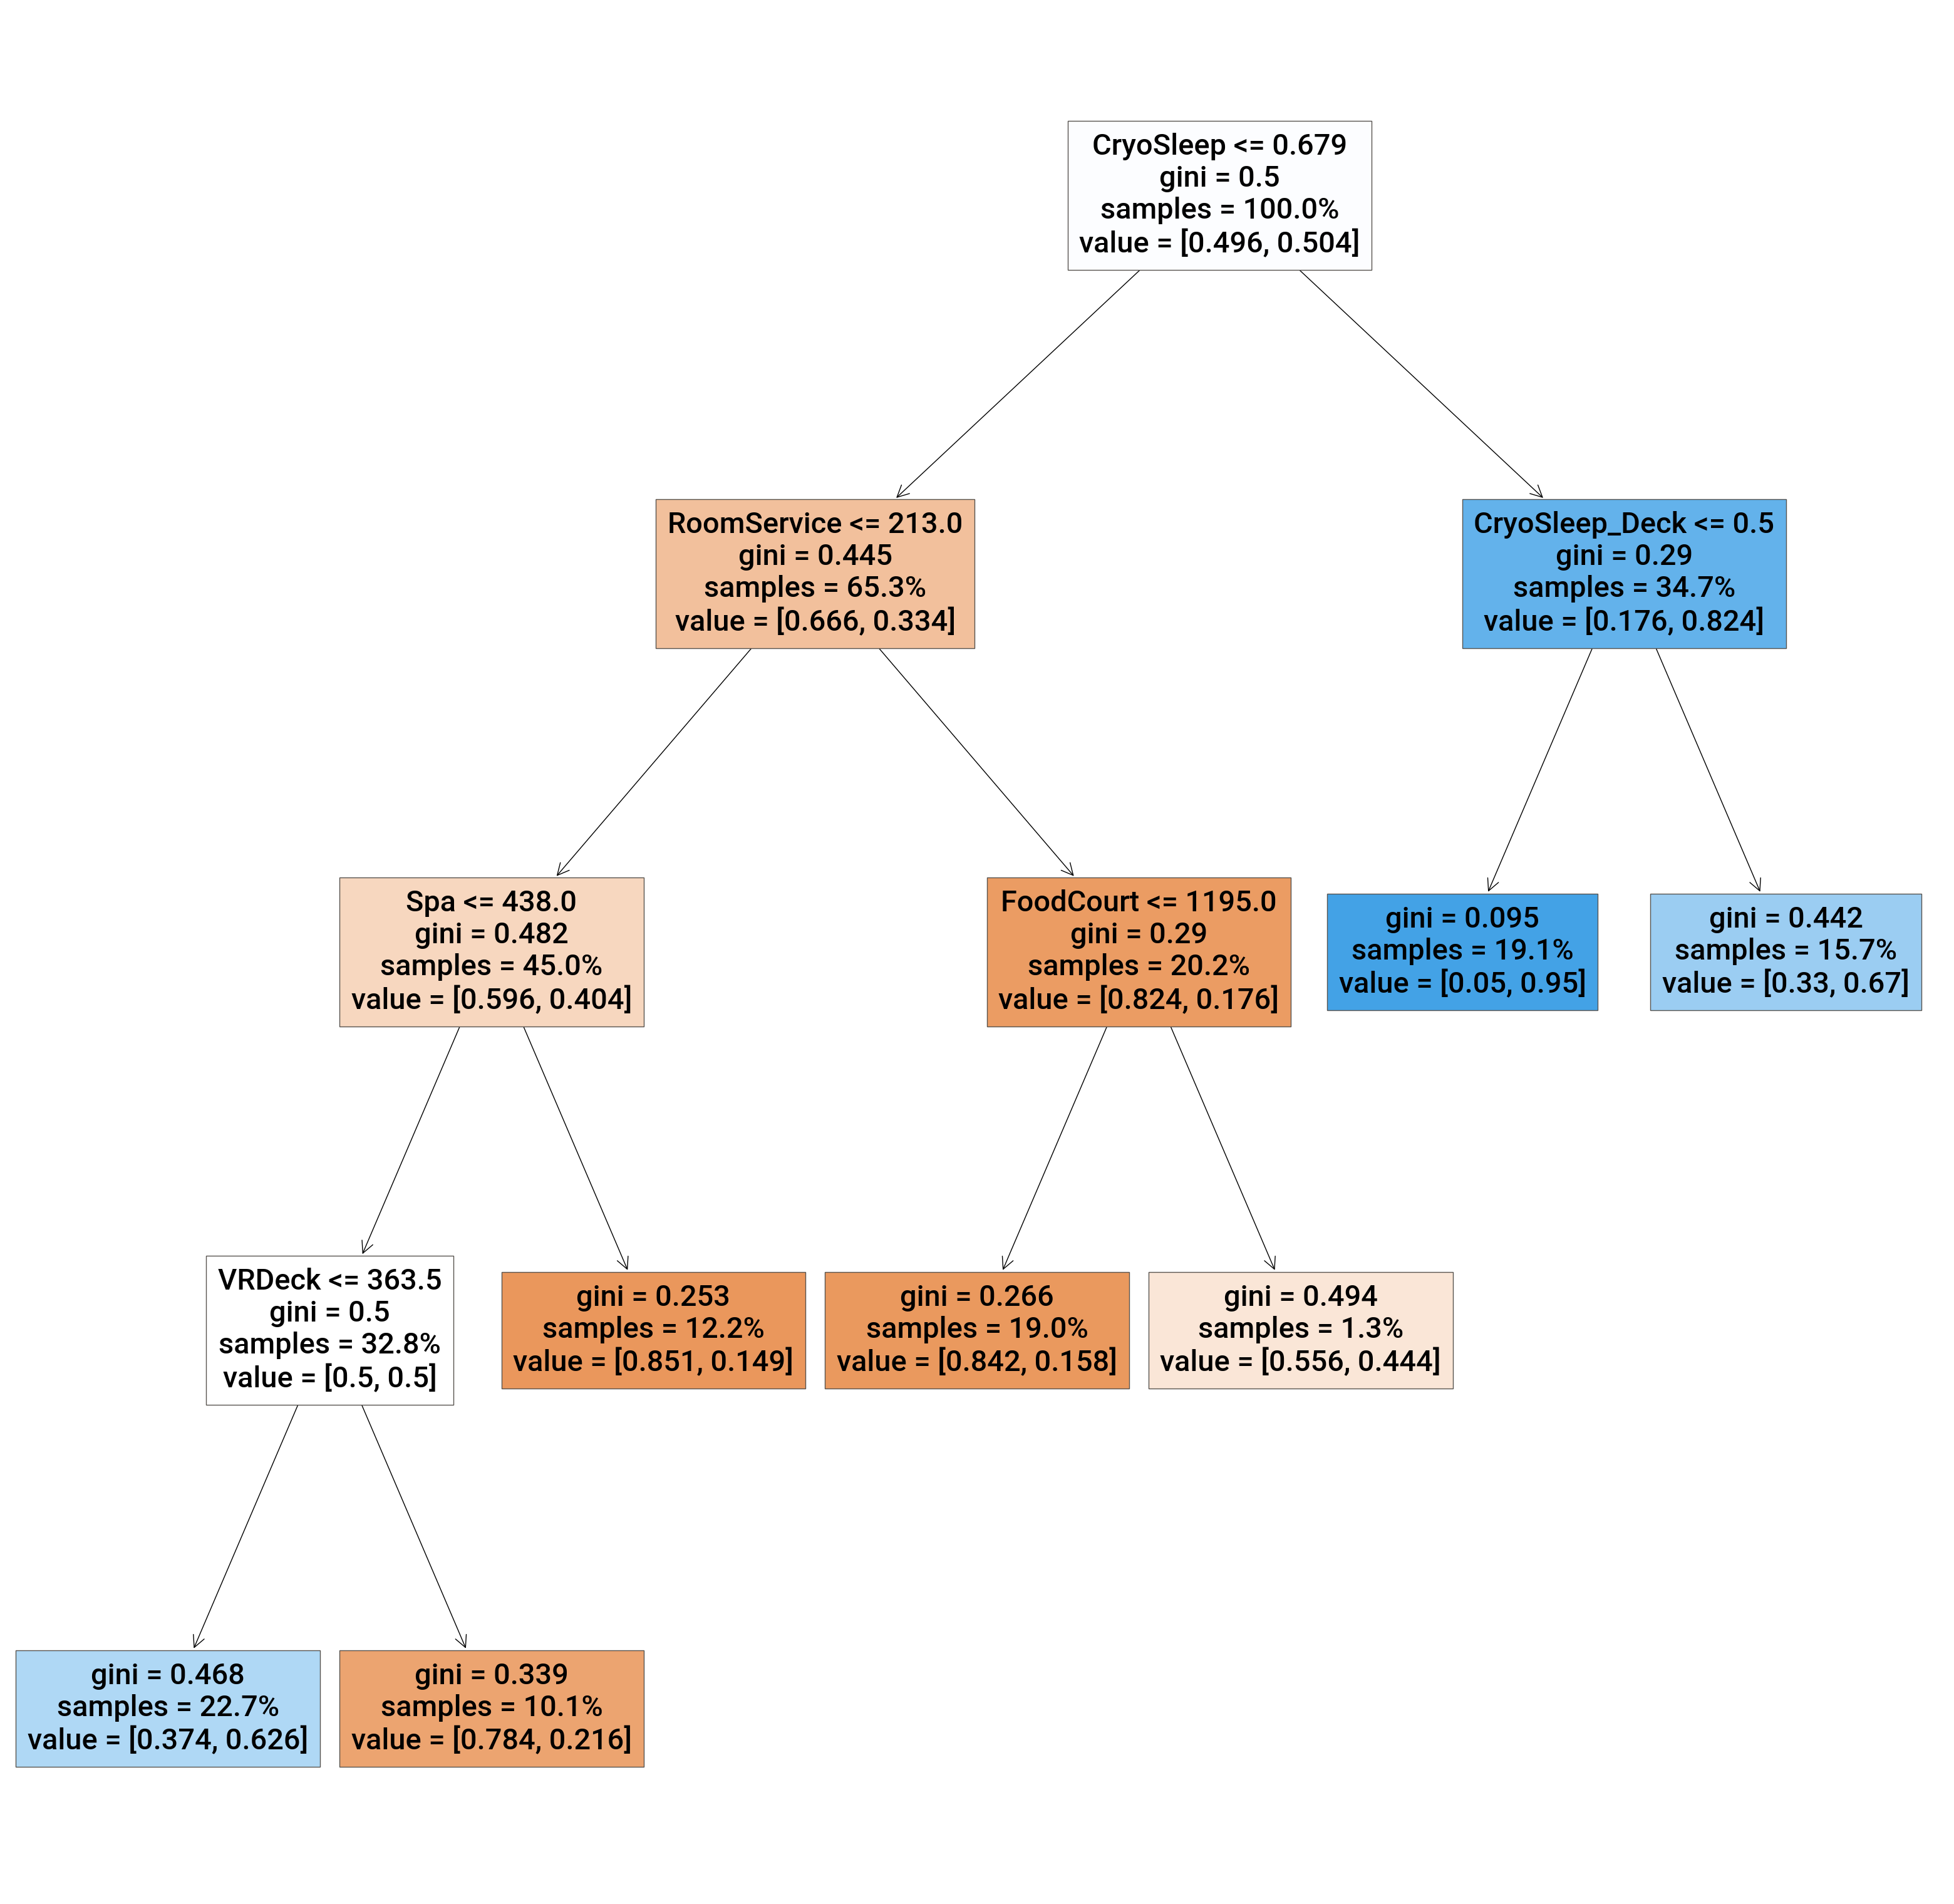

In [240]:
plt.figure(figsize=(40,40))
plot_tree(clf_dec, feature_names=xtrain.columns, proportion=True, filled=True)
plt.show()

In [241]:
clf_ln = LogisticRegression()
clf_ln.fit(xtrain, ytrain)
print(clf_ln.score(xtest, ytest))
print(f1_score(ytest, clf_ln.predict(xtest)))
print(classification_report(ytrain, clf_ln.predict(xtrain)))

0.7714723926380368
0.791389569478474
              precision    recall  f1-score   support

           0       0.83      0.69      0.76      1725
           1       0.74      0.86      0.80      1752

    accuracy                           0.78      3477
   macro avg       0.79      0.78      0.78      3477
weighted avg       0.79      0.78      0.78      3477



In [242]:
clf_gnb = GaussianNB()
clf_gnb.fit(xtrain, ytrain)
print(clf_gnb.score(xtest, ytest)) 
print(f1_score(ytest, clf_gnb.predict(xtest)))
print(classification_report(ytrain, clf_gnb.predict(xtrain)))

0.6681365030674846
0.7423723768417919
              precision    recall  f1-score   support

           0       0.87      0.38      0.53      1725
           1       0.61      0.95      0.74      1752

    accuracy                           0.66      3477
   macro avg       0.74      0.66      0.63      3477
weighted avg       0.74      0.66      0.63      3477



In [243]:
from sklearn.ensemble import RandomForestClassifier
clft = RandomForestClassifier(n_estimators=500)
clft = clft.fit(xtrain, ytrain)
print(clft.score(xtest, ytest))
print(f1_score(ytest, clft.predict(xtest)))
print(classification_report(ytrain, clft.predict(xtrain)))

0.794670245398773
0.7917557845615399
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1725
           1       1.00      1.00      1.00      1752

    accuracy                           1.00      3477
   macro avg       1.00      1.00      1.00      3477
weighted avg       1.00      1.00      1.00      3477



In [244]:
from sklearn.ensemble import GradientBoostingClassifier
boost = GradientBoostingClassifier(n_estimators=500).fit(xtrain, ytrain)
print(boost.score(xtest, ytest))
print(f1_score(ytest, boost.predict(xtest)))
print(classification_report(ytrain, boost.predict(xtrain)))

0.7967791411042945
0.7987086973034562
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1725
           1       0.93      0.93      0.93      1752

    accuracy                           0.93      3477
   macro avg       0.93      0.93      0.93      3477
weighted avg       0.93      0.93      0.93      3477



In [245]:
# from sklearn.ensemble import GradientBoostingClassifier
# boost = GradientBoostingClassifier(n_estimators=500, max_features=20, learning_rate=0.7).fit(xtrain, ytrain)
# print(boost.score(xtest, ytest))
# print(f1_score(ytest, boost.predict(xtest)))
# print(classification_report(ytrain, boost.predict(xtrain)))

In [120]:
# from xgboost import XGBClassifier
# boost1 = XGBClassifier()
# print(boost1.score(xtest, ytest))
# print(f1_score(ytest, boost1.predict(xtest)))
# print(classification_report(ytrain, boost1.predict(xtrain)))

In [ ]:
#to-do: 
#rede neural